# 1st task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, ifftshift

In [2]:
# инициализирую сигнал, состоящий из одного импульса

def fill_array(array, value, impulse_start):
    for i in range(0 + impulse_start, 99 + impulse_start):
        array[0][i] = value

In [3]:
# функция, вычисляющая свёртку

def conv(arr1, arr2):
    result = [0 for _ in range(len(arr1) + len(arr2) - 1)]
    for k in range(0, len(arr1) + len(arr2) - 1):
        for i in range(0, k + 1):
            if (i < len(arr1)) and (k - i < len(arr2)):
                result[k] = result[k] + arr1[i] * arr2[k - i]
    return result

In [4]:
# сигнал из 3-х импульсов

def three_impulses_meander(array, value1, value2, value3, impulse_start):
    for i in range(0 + impulse_start, 99 + impulse_start):
        array[0][i] = value1
        
    for i in range(200 + impulse_start, 299 + impulse_start):
        array[0][i] = value2
        
    for i in range(400 + impulse_start, 499 + impulse_start):
        array[0][i] = value3

In [5]:
# ЛЧМ-сигнал

def chirp_signal(amp, freq, num, beta):
    t = np.linspace(0, 1, num)
    tt = np.pi * (2 * freq * t + beta * t ** 2)
    res = amp * np.cos(tt)
    return res

In [6]:
# гармонический косинус-сигнал

def cosine_harmonic_signal(amp, freq, num):
    t = np.linspace(0, 1, num, endpoint=True)
    #t = np.arange(0, 2000, 0.1)
    x = amp * np.cos(2 * np.pi * freq * t)
    return x

In [7]:
# модуль спектра сигнала

def mag(signal, N):
    xFFT = fftshift(fft(signal, N))
    return np.abs(xFFT)

In [8]:
# позорная попытка сделать ФНЧ (Показал неверную работу)

def lowpass(mag, cutoff):
    mag[0:1000-cutoff] = 0
    mag[1000+cutoff:len(mag)-1] = 0
    return ifftshift(ifft(mag, 2000))

1) Найти свёртку двух сигналов, отстающих на 300 отсчётов

In [9]:
x = np.zeros((1, 1000))
y = np.zeros((1, 1000))

In [10]:
fill_array(x, 5, 0)
fill_array(y, 1, 300)

In [11]:
x = x[0]
y = y[0]

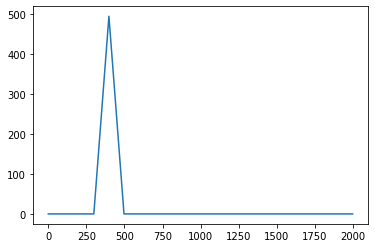

In [15]:
# график свёртки двух импульсов, отстающих на 300 отсчётов

plt.plot(conv(x, y))
plt.show()

Аналогично посчитаем свёртку для более сложного сигнала (3 импульса)

In [16]:
x1 = np.zeros((1, 1000))
y1 = np.zeros((1, 1000))

In [17]:
three_impulses_meander(x1, 5, 6, 7, 0)
three_impulses_meander(y1, 2, 3, 1, 500)

In [18]:
x1 = x1[0]
y1 = y1[0]

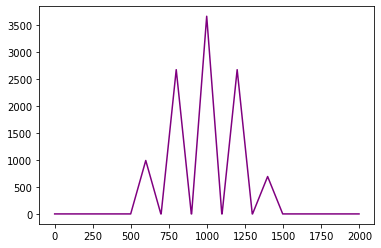

In [19]:
plt.plot([i for i in range(1999)], conv(x1, y1), color='purple')
plt.show()

2) Посчитаем свёртку для подшумлённых сигналов

In [20]:
# инициализируем АБГШ
awgn = np.random.randn(len(x))

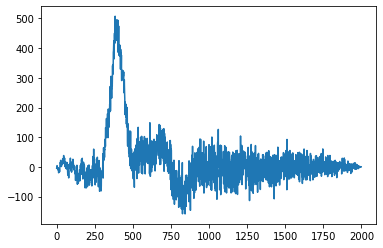

In [22]:
plt.plot([i for i in range(1999)], conv(x + awgn, y + awgn))

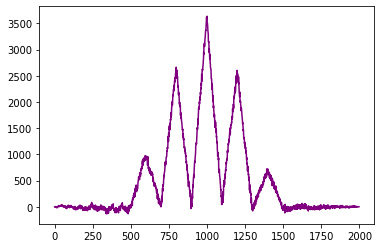

In [23]:
plt.plot([i for i in range(1999)], conv(x1 + awgn, y1 + awgn), color='purple')

Построим два ЛЧМ-сигнала и посмотрим их свёртку

Text(0.5, 1.0, 'Первый ЛЧМ-сигнал')

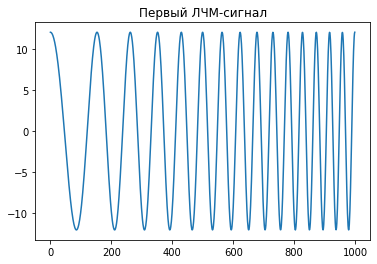

In [25]:
plt.plot(chirp_signal(amp=12, freq=5, beta=20, num=1000))
plt.title('Первый ЛЧМ-сигнал')

Text(0.5, 1.0, 'Второй ЛЧМ-сигнал')

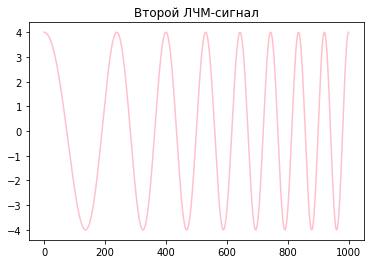

In [26]:
plt.plot(chirp_signal(amp=4, freq=3, beta=10, num=1000), color='pink')
plt.title('Второй ЛЧМ-сигнал')

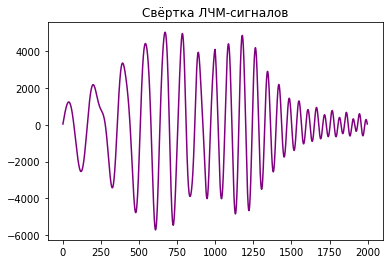

In [27]:
plt.plot([i for i in range(1999)], conv(chirp_signal(amp=12, freq=5, beta=20, num=1000), chirp_signal(amp=4, freq=3, beta=10, num=1000)), color='purple')
plt.title('Свёртка ЛЧМ-сигналов')
plt.show()

3) Для двух гармонических косинус сигналов с частотами 100 и 400 соответственно, строим спектры

In [29]:
N = 2000

x1 = cosine_harmonic_signal(1, 100, 1000)
x2 = cosine_harmonic_signal(2, 400, 1000)

Text(0.5, 1.0, 'Спектр сигнала x1')

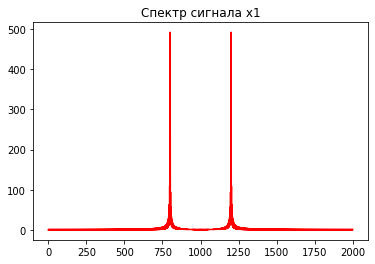

In [30]:
plt.plot(mag(x1, N), color='red')
plt.title('Спектр сигнала x1')

Text(0.5, 1.0, 'Спектр сигнала x2')

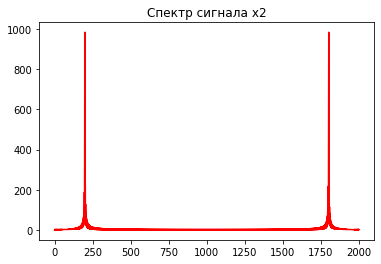

In [31]:
plt.plot(mag(x2, N), color='red')
plt.title('Спектр сигнала x2')

4) Строим спектры для сигналов x3 и x4

In [32]:
x3 = x1 + x2
x4 = x1 * x2

Text(0.5, 1.0, 'Спектр сигнала x3')

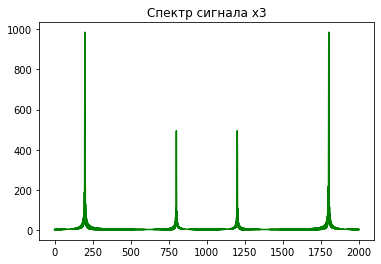

In [33]:
plt.plot(mag(x3, N), color='green')
plt.title('Спектр сигнала x3')

Text(0.5, 1.0, 'Спектр сигнала x4')

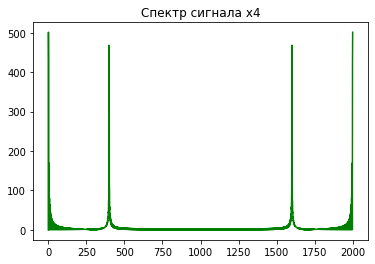

In [34]:
plt.plot(mag(x4, N), color='green')
plt.title('Спектр сигнала x4')

5) Инициализирую сложный сигнал (10 гармоник) и фильтрую с помощью ФНЧ нижние 3 гармоники

In [35]:
t = np.linspace(0, 1, 2000)
sig = 2 * np.sin(2 * np.pi * 130 * t) + 3 * np.sin(2 * np.pi * 80 * t) + np.sin(2 * np.pi * 300 * t) + np.sin(2 * np.pi * 55 * t) + 8 * np.sin(2 * np.pi * 175 * t) + 5 * np.sin(2 * np.pi * 20 * t) + 5 * np.sin(2 * np.pi * 525 * t) + 3 * np.sin(2 * np.pi * 190 * t) + 6 * np.sin(2 * np.pi * 480 * t) + 2 * np.sin(2 * np.pi * 200 * t)

Text(0.5, 1.0, 'Сигнал из 10 гармоник')

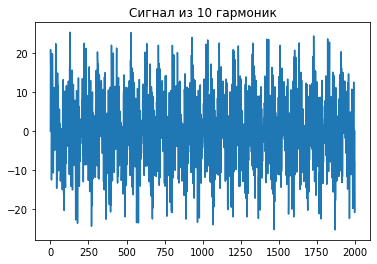

In [36]:
plt.plot(sig)
plt.title('Сигнал из 10 гармоник')

Text(0.5, 1.0, 'Спектр сигнала из 10 гармоник')

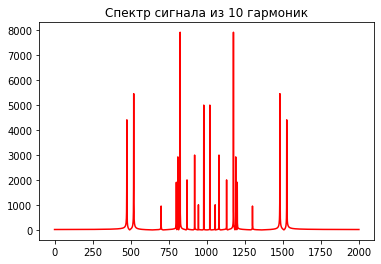

In [37]:
plt.plot(mag(sig, 2000), color='red')
plt.title('Спектр сигнала из 10 гармоник')

E:\Anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Неправильно отфильтрованный сигнал')

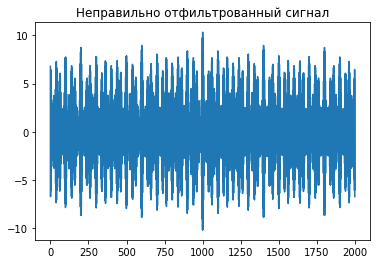

In [38]:
# отфильтровал 3 нижние гармоники, но сигнал получился НЕВЕРНЫМ
# почему раюотает неправильно еще не разобрался

plt.plot(lowpass(mag(sig, 2000), 100))
plt.title('Неправильно отфильтрованный сигнал')

In [ ]:
Как должен выглядеть правильно отфильтрованный сигнал

Text(0.5, 1.0, 'Правильно отфильтрованный сигнал')

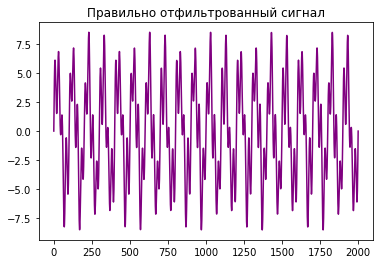

In [39]:
t = np.linspace(0, 1, 2000)
sig1 = 3 * np.sin(2 * np.pi * 80 * t) + np.sin(2 * np.pi * 55 * t) + 5 * np.sin(2 * np.pi * 20 * t)
plt.plot(sig1, color='purple')
plt.title('Правильно отфильтрованный сигнал')